## Import Liabraries

In [14]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# menampilkan seluruh kolom dan row pada dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import Dataset

In [15]:
# import dataset
customers_df =  pd.read_csv('customers.csv')
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [16]:
orders_df = pd.read_csv('orders.csv')
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [17]:
products_df = pd.read_csv('products.csv')
products_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [18]:
sales_df =  pd.read_csv('sales.csv')
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


## Assesing Dataset

### customers_df

In [19]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


In [20]:
# cek misisng value
customers_df.isnull().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

In [21]:
# cek duplciate value
print("Duplicate value: ", customers_df.duplicated().sum())

Duplicate value:  6


In [22]:
# describe data customers_df
customers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


##### Terdapat ke anehan pada kolom age dengan deskripsi max yaitu 700 sedangkan umur manusia tidak sampai segitu.

### Orders_df

In [23]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


##### tipe data dari order_date dan delivery_date salah seharusnya datetime bukan object.

In [24]:
# cek dupliacte value
print("Duplicate value: ", orders_df.duplicated().sum())

# cek deskripsi data orders_df
orders_df.describe()

Duplicate value:  0


,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


### Product_df

In [25]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.2+ KB


In [26]:
# cek  dupliacte value
print("Duplicate value: ", products_df.duplicated().sum())

# cek deskripsi data products_df
products_df.describe()

Duplicate value:  6


,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


##### Berdasarkan gambar di atas, dapat dilihat bahwa terdapat 6 data yang terduplikasi pada product_df. Pada tahap cleaning data, kita akan menghapus duplikasi tersebut.

### Sales_df

In [27]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


In [28]:
# cek missin value
sales_df.isnull().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

In [29]:
# cek dulplicate value
print("Duplicate value: ", sales_df.duplicated().sum())

# cek deskripsi data sales_df
sales_df.describe()

Duplicate value:  0


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


### Identifikasi masalah
1. customers_df memiliki 18 missing value, 6 duplicate value, dan terdapat keanehan pada kolom age max 700 sedangkan umur manusia tidak sampai segitu.
2. orders_df memiliki 0 missing value, 0 duplicate value, dan terdapat keanehan pada kolom order_date dan delivery_date yang salah seharusnya datetime bukan object.
3. product_df memiliki 0 missing value, 6 duplicate value.
4. sales_df memiliki 19 missing value, 0 duplicate value.

## Cleaning Data

### Duplicate customers_df

In [30]:
# menghapus duplicate value
customers_df.drop_duplicates(inplace=True)

In [31]:
# cek  dupliacte value
print("Duplicate value: ", customers_df.duplicated().sum())

Duplicate value:  0


### Missing Value customers_df

In [32]:
# menampilkan data yang missing value
customers_df[customers_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
...,...,...,...,...,...,...,...,...,...
914,909,fulan 909,NaN,62,976 Murray Station StApt. 036,3227,Langfort,Tasmania,Australia
934,929,fulan 929,NaN,68,394 Lily HillSuite 153,2353,Beahanfurt,Northern Territory,Australia
948,943,fulan 943,NaN,64,3117 Heller PlaceSuite 149,822,North Elijah,South Australia,Australia
952,946,fulan 946,NaN,24,8227 Nicholas HillSuite 150,115,South Jasper,Queensland,Australia


##### Berdasarkan gambar di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.


In [33]:
customers_df.gender.value_counts()

Prefer not to say    725
Male                 143
Female               115
Name: gender, dtype: int64

In [34]:
# hasil di atas nilai yang paling dominan adalah prefer not to say, nilai ini yang kita gunakan untuk mengganti missing value
customers_df.fillna(value='Prefer not to say', inplace=True)

In [35]:
# cek miissing value
customers_df.isnull().sum()

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

### Menangani inaccurate value  customers_df

##### Oke, sekarang kita akan mengatasi masalah inaccurate value pada kolom age. Sebagai awal, kita perlu melihat data baris data yang mengandung inaccurate value tersebut (baris dengan nilai age maksimum).

In [36]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


##### Berdasarkan data tersebut, kita bisa berasumsi bahwa inaccurate value tersebut terjadi karena human error sehingga kelebihan memasukkan nilai nol. Oleh karena itu, gantilah dengan nilai 70. Proses ini dilakukan dengan memanfaatkan method replace()

In [37]:
# replace age dari 700 ke 70
customers_df.age.replace(customers_df.age.max(), 70, inplace=True)

In [38]:
# cek hasil replace
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


#####  ternyata masih ada data age yang diatas normal 500, kita coba lihat age lebih dari 100

In [39]:
customers_df[customers_df.age >= 100]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


In [40]:
# replace age 500 ke 50
customers_df.age.replace(500, 50, inplace=True)

In [41]:
# cek hasil replace
customers_df[customers_df.age >= 100]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country


In [42]:
# coba kita cek data describe dulu
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


Berdasarkan hasil tersebut dapat dilihat bahwa kolom age memiliki nilai maksimum yang cukup masuk akal. Selain itu, jika Ada perhatikan, nilai mean dan standard deviation ikut berubah setelah kita menangani inaccurate value tersebut.

### Cleaning data orders_df

In [43]:
# mengganti tipe data pada kolom order_date dan delivery_date object menjadi datetime
orders_df.order_date = pd.to_datetime(orders_df.order_date)
orders_df.delivery_date = pd.to_datetime(orders_df.delivery_date)

In [44]:
# mengecek kembali tipe data
orders_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


### Cleaning data products_df

In [45]:
# menghapus duplicate value
products_df.drop_duplicates(inplace=True)

In [46]:
# cek  dupliacte value 
print("Duplicate value: ", products_df.duplicated().sum())

Duplicate value:  0


### Cleaning data sales_df

In [47]:
# menampilkan data missing value
sales_df[sales_df.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
...,...,...,...,...,...,...
1775,1775,359,694,113,2,NaN
1902,1902,381,1218,105,3,NaN
2025,2025,408,611,112,3,NaN
2164,2164,436,583,100,3,NaN


Berdasarkan tampilan data tersebut, kita menemukan bahwa nilai total_price merupakan hasil perkalian antara price_per_unit dan quantity. Kita dapat menggunakan pola ini untuk menangani missing value pada kolom total_price.

In [48]:
# isi kolom total_price dengan = price_per_unit * quantity
sales_df['total_price'] = sales_df['price_per_unit'] * sales_df['quantity']

In [49]:
# cek missing value lagi
sales_df.isnull().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

# EDA

Berdasarkan beberapa masalah tersebut, kita dapat mendefinisikan beberapa pertanyaan bisnis seperti berikut.

1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
2. Produk apa yang paling banyak dan paling sedikit terjual?
3. Bagaimana demografi pelanggan yang kita miliki?
4. Kapan terakhir pelanggan melakukan transaksi?
5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
6. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir? 

#### Eksplorasi Data customers_df

In [50]:
customers_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,1001.0,NaN,NaN,NaN,500.942058,289.013599,1.0,251.0,501.0,751.0,1000.0
customer_name,1001,1000,fulan 943,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1001,3,Prefer not to say,743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1001.0,NaN,NaN,NaN,49.874126,17.644663,20.0,34.0,50.0,65.0,80.0
home_address,1001,1000,3117 Heller PlaceSuite 149,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code,1001.0,NaN,NaN,NaN,5000.693307,2886.084454,2.0,2398.0,5079.0,7454.0,9998.0
city,1001,961,New Ava,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,1001,8,South Australia,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1001,1,Australia,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah pelanggan sebanyak 1001 orang yang berumur di kisaran antara 20 hingga 80 tahun dengan rata-rata umur sebesar 49.87 tahun dengan standar deviasinya sebesar 17.64 tahun. Informasi ini tentunya dapat memberikan gambaran bahwa segmentasi pelanggan yang kita miliki cukup luas mulai dari remaja hingga lanjut usia.  

In [51]:
# groupby gender
customers_df.groupby('gender').agg({
    'customer_id': 'nunique',
    'age': ['min', 'max', 'mean', 'std']})

customer_id age                          
                      nunique min max       mean        std
gender                                                     
Female                    115  20  79  49.147826  16.646607
Male                      143  20  80  51.230769  18.462635
Prefer not to say         742  20  80  49.725437  17.644283

Berdasarkan pivot table di atas, dapat diketahui bahwa pelanggan yang kita miliki didominasi oleh jenis kelamin prefer not to say. Di lain sisi, distribusi umur mereka ternyata cukup mirip yaitu berkisar antara 20 hingga 80 tahun.

In [52]:
# melihat persebaran data berdasarkan city dan state
customers_df.groupby(by=['city']).customer_id.nunique().sort_values(ascending=False).head(10)

city
East Aidan       3
East Sophia      3
New Ava          3
West Jackfort    2
Corkeryshire     2
Ryanberg         2
South Hannah     2
Feeneymouth      2
Lake Jesse       2
West Kai         2
Name: customer_id, dtype: int64

In [53]:
# melihat persebaran data berdasarkan city dan state
customers_df.groupby(by=['state']).customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan kita cukup merata pada setiap kota dan negara bagian. Pelanggan kita paling banyak berada di kota East Aidan, East Sophia, dan New Ava dengan jumlah masing-masing tiga pelanggan. Selain itu, pelanggan kita paling banyak berasal dari negara bagian South Australia.

#### Eksplorasi Data orders_df

menghitung selisih antar delivery_date dan order_date serta menyimpannya sebagai delivery_time.

In [54]:
delivery_time =  orders_df.delivery_date - orders_df.order_date
delivery_time = delivery_time.dt.days
orders_df['delivery_time'] = delivery_time
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25
1,2,473,50490,2021-02-03,2021-02-13,10
2,3,774,46763,2021-10-08,2021-11-03,26
3,4,433,39782,2021-05-06,2021-05-19,13
4,5,441,14719,2021-03-23,2021-03-24,1


In [55]:
# cek data desribe
orders_df.describe(include='all').T

C:\Users\Silent Monster\AppData\Local\Temp\ipykernel_10084\1525747088.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all').T
C:\Users\Silent Monster\AppData\Local\Temp\ipykernel_10084\1525747088.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
order_id,1000.0,NaN,NaT,NaN,NaT,NaT,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
customer_id,1000.0,NaN,NaT,NaN,NaT,NaT,506.64,277.115502,1.0,275.25,515.0,737.25,1000.0
payment,1000.0,NaN,NaT,NaN,NaT,NaT,33972.936,14451.609047,10043.0,21329.25,33697.5,46249.0,59910.0
order_date,1000,291,2021-06-20,10,2021-01-01,2021-10-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delivery_date,1000,305,2021-08-09,9,2021-01-03,2021-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delivery_time,1000.0,NaN,NaT,NaN,NaT,NaT,14.078,7.707225,1.0,8.0,14.0,21.0,27.0


Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 14 hari dengan nilai maksimum sebesar 27 hari dan nilai minimum sebesar 1 hari. 

#### Eksplorasi Data orders_df dan customers_df

Jika Anda perhatikan, pada data orders_df terdapat kolom yang berisi informasi terkait customer id pelanggan yang pernah melakukan order. Informasi ini bisa kita gunakan untuk mengidentifikasi pelanggan yang belum pernah melakukan order. Untuk melakukan hal ini, kita bisa membuat sebuah kolom baru bernama “status” pada data customers_df. Kolom tersebut memiliki nilai “Active” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali. Berikut merupakan kode untuk melakukannya. 

In [56]:
# menambahkan kolom status jika "Active" untuk pelanggan yang pernah order dan sebaliknya "Non Active"  untuk pelanggan yang belum pernah order
customer_id_in_orders_df =  orders_df.customer_id.to_list()

customers_df['status'] = customers_df.customer_id.apply(lambda x: 'Active' if x in customer_id_in_orders_df else 'Non Active')

customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
880,876,fulan 876,Male,20,2352 Kutch ParkwayApt. 436,6148,New Aidenfurt,Northern Territory,Australia,Active
390,390,fulan 390,Prefer not to say,36,806 O'connell CrestApt. 665,7155,South Eveshire,Western Australia,Australia,Active
402,402,fulan 402,Prefer not to say,22,017 Maddison KnollSuite 875,1712,West Cooper,Tasmania,Australia,Active
711,710,fulan 710,Male,60,606 Lucy ParadeSuite 217,1666,Kulasville,New South Wales,Australia,Active
764,762,fulan 762,Prefer not to say,43,07 Lily LoopSuite 494,8719,South Codyhaven,Tasmania,Australia,Active


In [57]:
customers_df.groupby(by=['status']).customer_id.nunique().sort_values(ascending=False)

status
Active        617
Non Active    383
Name: customer_id, dtype: int64

Seperti yang terlihat pada pivot table di atas, terdapat cukup banyak pelanggan yang belum pernah melakukan transaksi sebelumnya. Ini tentunya merupakan kabar buruk bagi kita karena hampir 30% pelanggan kita belum pernah melakukan order sebelumnya.

Untuk memperoleh lebih banyak informasi terkait kedua data tersebut, kita perlu menggabungkan keduanya melalui proses join atau merge.

In [58]:
# join customers_df dan orders_df
customers_orders_df = pd.merge(customers_df, orders_df, on='customer_id', how='left')
customers_orders_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status,order_id,payment,order_date,delivery_date,delivery_time
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,Active,455.0,24550.0,2021-04-04,2021-04-06,2.0
1,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,Active,670.0,10246.0,2021-03-06,2021-04-01,26.0
2,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,Active,729.0,35593.0,2021-02-18,2021-03-01,11.0
3,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,Non Active,NaN,NaN,NaT,NaT,NaN
4,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,Non Active,NaN,NaN,NaT,NaT,NaN


#### Jumlah order berdasarkan kota

In [59]:
# jumlah order by city
customers_orders_df.groupby(by=['city']).order_id.nunique().sort_values(ascending=False).reset_index()[:10]

,city,order_id
0,New Ava,6
1,Jordanside,6
2,Port Hannahburgh,5
3,O'keefeton,5
4,Rubyfort,5
5,East Max,5
6,West Kai,5
7,Lake Rose,5
8,New Angelina,4
9,Port Aaronton,4


berdasarkan hasil tersebut, diketahui bahwa kota Jordanside dan New Ava merupakan dua kota yang memiliki jumlah order terbanyak.

#### Jumlah order berdasarkan state

In [60]:
# jumlah order by state
customers_orders_df.groupby(by=['state']).order_id.nunique().sort_values(ascending=False).reset_index()[:10]

,state,order_id
0,South Australia,148
1,Queensland,139
2,Western Australia,130
3,New South Wales,129
4,Australian Capital Territory,118
5,Victoria,118
6,Tasmania,112
7,Northern Territory,106


#### Jumlah order berdasarkan gender

In [61]:
# jumlah order by gender
customers_orders_df.groupby(by=['gender']).order_id.nunique().sort_values(ascending=False).reset_index()[:10]

,gender,order_id
0,Prefer not to say,725
1,Female,139
2,Male,136


Berdasarkan hasil tersebut, dapat dilihat bahwa kebanyakan order dilakukan oleh pelanggan yang berjenis kelamin prefer not to say. Hal ini tentunya sejalan dengan jumlah pelanggan yang kebanyakan dari kelompok gender tersebut.

#### Jumlah order berdasarkan kelompok usia

kita juga bisa mengeksplorasi jumlah order berdasarkan kelompok usia. Untuk melakukan hal ini, kita perlu mendefinisikan sebuah kolom baru bernama “age_group”. Kolom ini akan membantu kita dalam mengelompokkan pelanggan ke dalam tiga kelompok, yaitu youth, adults, dan seniors.

In [62]:
# membagi age group dengan "Youth" <= 24, "Adults" 25-63, "Seniors" > 64
customers_orders_df['age_group'] = customers_orders_df['age'].apply(lambda x: 'Youth' if x <= 24 else ('Adults' if x <= 64 else 'Seniors'))

# jumlah order by age group
customers_orders_df.groupby(by=['age_group']).order_id.nunique().sort_values(ascending=False).reset_index()[:10]

,age_group,order_id
0,Adults,681
1,Seniors,226
2,Youth,93


Berdasarkan hasil tersebut diketahui bahwa pelanggan yang paling banyak melakukan order berasal dari kelompok usia Adults.

Oke, sejauh ini kita telah menemukan banyak sekali informasi yang tentunya menarik untuk ditelusuri lebih dalam. Namun, sebelum itu mari kita mengeksplorasi dua data yang lain (product_df dan sales_df) terlebih dahulu. 

#### Eksplorasi Data product_df dan sales_df

In [63]:
products_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,1260.0,NaN,NaN,NaN,629.5,363.874979,0.0,314.75,629.5,944.25,1259.0
product_type,1260,3,Shirt,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name,1260,35,Denim,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,1260,8,XS,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
colour,1260,7,red,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,1260.0,NaN,NaN,NaN,105.805556,9.704423,90.0,95.75,108.5,114.0,119.0
quantity,1260.0,NaN,NaN,NaN,60.15,11.670573,40.0,50.0,60.0,70.0,80.0
description,1260,1260,"A red coloured, XS sized, Oxford Cloth Shirt",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
sales_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
sales_id,5000.0,2499.5000,1443.520003,0.0,1249.75,2499.5,3749.25,4999.0
order_id,5000.0,503.0382,285.964418,1.0,258.00,504.5,749.00,999.0
product_id,5000.0,634.0532,363.255794,1.0,323.00,635.0,951.00,1259.0
price_per_unit,5000.0,103.5016,9.195004,90.0,95.00,102.0,112.00,119.0
quantity,5000.0,1.9924,0.807510,1.0,1.00,2.0,3.00,3.0
total_price,5000.0,206.3600,86.357457,90.0,112.00,204.0,285.00,357.0


Berdasarkan hasil tersebut, dapat dilihat bahwa harga barang yang dijual berkisar antara 90 hingga 119 dolar. Selain itu, kita juga memperoleh informasi lain yang tidak kalah menarik yaitu pada setiap transaksi pelanggan paling banyak membeli tiga buah item dalam satu jenis produk dengan total harga sebesar 357 dolar. 

In [65]:
# product price terendah dan termahal
products_df.sort_values(by=['price'], ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
704,698,Jacket,Parka,L,violet,119,53,"A violet coloured, L sized, Parka Jacket"
671,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
698,692,Jacket,Parka,M,indigo,119,66,"A indigo coloured, M sized, Parka Jacket"
699,693,Jacket,Parka,L,indigo,119,44,"A indigo coloured, L sized, Parka Jacket"
700,694,Jacket,Parka,XL,indigo,119,78,"A indigo coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1225,1219,Trousers,Pleated,XL,indigo,90,45,"A indigo coloured, XL sized, Pleated Trousers"
1226,1220,Trousers,Pleated,XS,violet,90,58,"A violet coloured, XS sized, Pleated Trousers"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"
1228,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"


Selanjutnya, kita bisa menggunakan pivot table untuk mencari informasi terkait produk berdasarkan tipe dan nama produknya.

In [66]:
products_df.groupby(by=['product_type']).agg({
    "product_id" : "nunique",
    "quantity" : "sum",
    'price': ['min', 'max']})

product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

In [67]:
products_df.groupby(by=['product_name']).agg({
    "product_id" : "nunique",
    "quantity" : "sum",
    'price': ['min', 'max']})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

In [68]:
# join 2 dataframe sales_df dan products_df
sales_product_df = pd.merge(sales_df, products_df, on='product_id', how='left')

sales_product_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


Jika diperhatikan kembali, hasil dari proses merge di atas memiliki perbedaan antara nilai price_per_unit dan price. Hal ini bisa terjadi karena adanya potongan harga, biaya operasional, dan biaya lainnya.

In [69]:
# Oke, sekarang kita coba melihat informasi penjualan produk berdasarkan tipenya. 
sales_product_df.groupby(by=['product_type']).agg({
    "sales_id" : "nunique",
    "quantity_x" : "sum",
    'total_price': "sum"})


,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


Jika Anda perhatikan pivot table di atas, Trousers merupakan tipe produk yang paling laris. Akan tetapi, jika dilihat berdasarkan revenue yang diterima, Jacket merupakan tipe produk yang paling banyak menyumbang revenue perusahaan. 

In [70]:
# Kita bisa membuat groupby yang sama untuk melihat informasi penjualan berdasarkan nama produk
sales_product_df.groupby(by=['product_name']).agg({
    "sales_id" : "nunique",
    "quantity_x" : "sum",
    'total_price': "sum"}).sort_values(by=['total_price'], ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
...,...,...,...
Pullover,143,276,25116
Polo,131,264,25080
Coach,134,265,24645


Berdasarkan pivot table tersebut, diketahui bahwa produk Denim merupakan produk yang paling laris dan juga paling banyak menyumbang revenue terhadap perusahaan.  

#### Eksplorasi Data all_df

Hmm…, jika diperhatikan data penjualan ini cukup menarik untuk ditelusuri lebih dalam. Hal ini dilakukan guna melihat pola pembelian berdasarkan demografi pelanggan. Oleh karena itu, kita perlu membuat sebuah DataFrame baru bernama all_df untuk menampung semua informasi dari keempat tabel yang kita miliki.

In [71]:
# join all datframe
all_df = pd.merge(sales_product_df, customers_orders_df, on='order_id', how='left')
all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status,payment,order_date,delivery_date,delivery_time,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt",64,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,30811.0,2021-08-30,2021-09-24,25.0,Seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket",64,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,30811.0,2021-08-30,2021-09-24,25.0,Seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",64,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,30811.0,2021-08-30,2021-09-24,25.0,Seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers",64,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,30811.0,2021-08-30,2021-09-24,25.0,Seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket",64,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,30811.0,2021-08-30,2021-09-24,25.0,Seniors


Selanjutnya, mari kita coba lihat preferensi pembelian berdasarkan state pelanggan dan tipe produk

In [72]:
all_df.groupby(by=['state','product_type']).agg({
    "quantity_x" : "sum",
    'total_price': "sum"})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

Pivot table di atas memberikan kita gambaran terkait tipe produk yang disukai pengguna berdasarkan lokasi negara bagiannya. Jika diperhatikan, tipe produk Jacket paling banyak terjual pada negara bagian Queensland, South Australia, dan New South Wales. Untuk tipe produk lain, Anda bisa melihatnya pada gambar pivot table di atas. 

Sekarang Anda bisa melakukan hal yang sama untuk mengetahui selera tipe produk pelanggan berdasarkan gender dan kelompok usia.

In [73]:
all_df.groupby(by=['age_group','product_name']).agg({
    "quantity_x" : "sum",
    'total_price': "sum"})

quantity_x  total_price
age_group product_name                              
Adults    Bomber                    190        19000
          Camp Collared             166        16268
          Cardigan                  183        20496
          Cargo Pants               174        17748
          Casual Slim Fit           206        24514
          Chambray                  203        21518
          Chinos                    190        21470
          Coach                     176        16368
          Cords                     156        14664
          Cropped                   213        24495
          Cuban Collar              195        20475
          Denim                     345        34410
          Drawstring                190        18240
          Dress                     163        16952
          Flannel                   182        21476
          Henley                    214        20116
          High-Waisted              180        17820
          Joggers                   237        22041
          Leather                   177        17346
          Linen                     181        16471
          Mandarin Collar           169        18421
          Oxford Cloth              201        19296
          Parka                     195        22035
          Peacoat                   177        19293
          Pleated                   212        22260
          Polo                      178        16910
          Puffer                    201        23718
          Pullover                  196        17836
          Relaxed Leg               193        17370
          Shearling                 223        26091
          Slim-Fit                  191        18527
          Tracksuit Bottoms         170        19040
          Trench Coat               202        24038
          Windbreaker               194        19788
          Wool                      166        17596
Seniors   Bomber                     82         8200
          Camp Collared              76         7448
          Cardigan                   58         6496
          Cargo Pants                70         7140
          Casual Slim Fit            75         8925
          Chambray                   64         6784
          Chinos                     59         6667
          Coach                      67         6231
          Cords                      62         5828
          Cropped                    49         5635
          Cuban Collar               46         4830
          Denim                     128        12556
          Drawstring                 60         5760
          Dress                      49         5096
          Flannel                    75         8850
          Henley                     47         4418
          High-Waisted               64         6336
          Joggers                    72         6696
          Leather                    61         5978
          Linen                      71         6461
          Mandarin Collar            34         3706
          Oxford Cloth               67         6432
          Parka                      53         5989
          Peacoat                    77         8393
          Pleated                    57         5985
          Polo                       53         5035
          Puffer                     65         7670
          Pullover                   53         4823
          Relaxed Leg                80         7200
          Shearling                  67         7839
          Slim-Fit                   66         6402
          Tracksuit Bottoms          60         6720
          Trench Coat                76         9044
          Windbreaker                66         6732
          Wool                       67         7102
Youth     Bomber                     25         2500
          Camp Collared              37         3626
          Cardigan                   19         2128
          Cargo Pants                23         2346
 

In [74]:
all_df.groupby(by=['gender','product_name']).agg({
    "quantity_x" : "sum",
    'total_price': "sum"})

quantity_x  total_price
gender            product_name                              
Female            Bomber                     55         5500
                  Camp Collared              37         3626
                  Cardigan                   30         3360
                  Cargo Pants                39         3978
                  Casual Slim Fit            30         3570
                  Chambray                   35         3710
                  Chinos                     48         5424
                  Coach                      44         4092
                  Cords                      19         1786
                  Cropped                    45         5175
                  Cuban Collar               41         4305
                  Denim                      73         7241
                  Drawstring                 50         4800
                  Dress                      35         3640
                  Flannel                    39         4602
                  Henley                     43         4042
                  High-Waisted               37         3663
                  Joggers                    33         3069
                  Leather                    38         3724
                  Linen                      52         4732
                  Mandarin Collar            26         2834
                  Oxford Cloth               34         3264
                  Parka                      41         4633
                  Peacoat                    41         4469
                  Pleated                    46         4830
                  Polo                       35         3325
                  Puffer                     42         4956
                  Pullover                   47         4277
                  Relaxed Leg                37         3330
                  Shearling                  42         4914
                  Slim-Fit                   52         5044
                  Tracksuit Bottoms          41         4592
                  Trench Coat                33         3927
                  Windbreaker                33         3366
                  Wool                       34         3604
Male              Bomber                     55         5500
                  Camp Collared              29         2842
                  Cardigan                   55         6160
                  Cargo Pants                47         4794
                  Casual Slim Fit            37         4403
                  Chambray                   58         6148
                  Chinos                     35         3955
                  Coach                      29         2697
                  Cords                      39         3666
                  Cropped                    57         6555
                  Cuban Collar               31         3255
                  Denim                      39         3723
                  Drawstring                 32         3072
                  Dress                      31         3224
                  Flannel                    25         2950
                  Henley                     37         3478
                  High-Waisted               26         2574
                  Joggers                    48         4464
                  Leather                    58         5684
                  Linen                      38         3458
                  Mandarin Collar            33         3597
                  Oxford Cloth               29         2784
                  Parka                      52         5876
                  Peacoat                    34         3706
                  Pleated                    50         5250
                  Polo                       32         3040
                  Puffer                     28         3304
                  Pullover                   45         4095
                  Relaxed Leg                45         4050
           

Nah, pivot table di atas dapat memberikan kita gambaran terkait selera tipe produk pelanggan berdasarkan gender dan kelompok usia. Semua informasi ini akan sangat membantu Anda dalam menjawab pertanyaan terkait preferensi pengguna berdasarkan demografinya.

## Visualisasi

### 1. Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

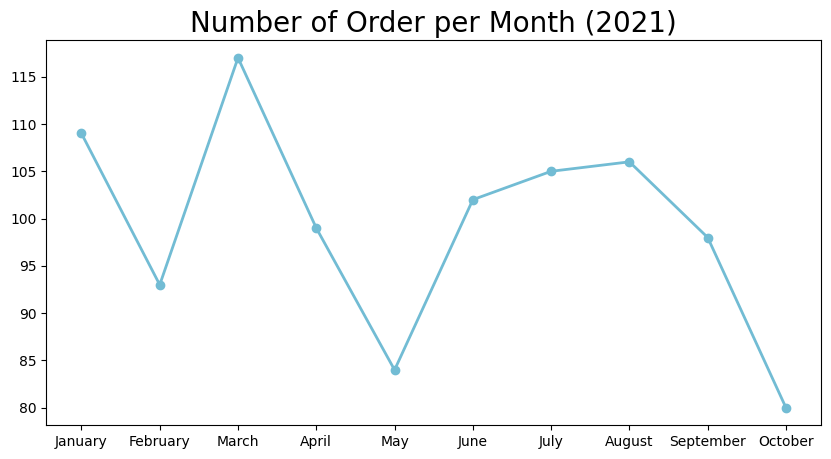

In [75]:
# resample dulu ke timeseries
monthly_order_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id" : "nunique",
    "total_price" : "sum"})

monthly_order_df.index = monthly_order_df.index.strftime('%Y-%m')
monthly_order_df =  monthly_order_df.reset_index()
monthly_order_df.rename(columns= {
    "order_id" : "order_count",
    "total_price" : "revenue"}, inplace=True)

monthly_order_df.head()

# Ubah ke datetime dulu
monthly_order_df['order_date'] = pd.to_datetime(monthly_order_df['order_date']) 

#mengubah format order_date menjadi nama bulan
monthly_order_df['order_date'] = monthly_order_df['order_date'].dt.strftime('%B')

# visualisasi
plt.figure(figsize=(10, 5))
plt.plot(monthly_order_df['order_date'], monthly_order_df['order_count'], marker='o', linewidth=2, color='#72BCD4')
plt.title('Number of Order per Month (2021)', fontsize=20, loc='center')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah order terbanyak terjadi pada bulan Maret. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan Februari, April, Mei, dan Oktober. 

Tentunya penurunan tersebut akan berdampak pada total revenue yang diperoleh perusahaan.

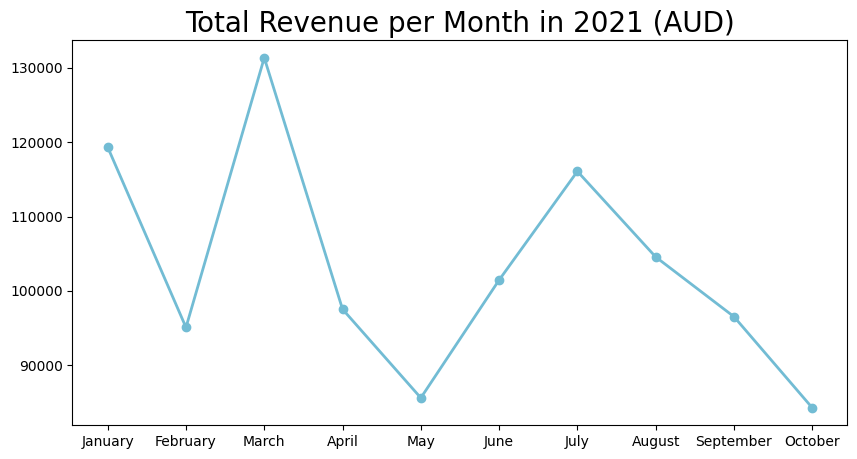

In [76]:
# visualisasi revenue
plt.figure(figsize=(10, 5))
plt.plot(monthly_order_df['order_date'], monthly_order_df['revenue'], marker='o', linewidth=2, color='#72BCD4')
plt.title('Total Revenue per Month in 2021 (AUD)', fontsize=20, loc='center')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Penurunan jumlah orderan yang sangat signifikan terjadi pada bulan Februari, April, Mei, dan Oktober berdampak terhadap penurunan revenue perusahaan. Normalnya, kita harus mencari tahu penyebab terjadinya penurunan tersebut dengan mempertimbangkan banyak hal, seperti keberadaan kompetitor, campaign, dll. Namun, untuk studi kasus ini, kita tidak memiliki cukup informasi terkait hal tersebut.

#### 2. Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

In [77]:
sum_order_df = all_df.groupby(by=["product_name"]).quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_df.head(15)

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
...,...,...
10,Oxford Cloth,289
11,Drawstring,288
12,Slim-Fit,288
13,Windbreaker,287


Untuk mempermudah kita dalam menyampaikan informasi tersebut, kita harus membuat visualisasi data dalam bentuk bar chart. Selain itu, untuk mempermudah orang lain dalam mengidentifikasi produk dengan performa terbaik dan terburuk

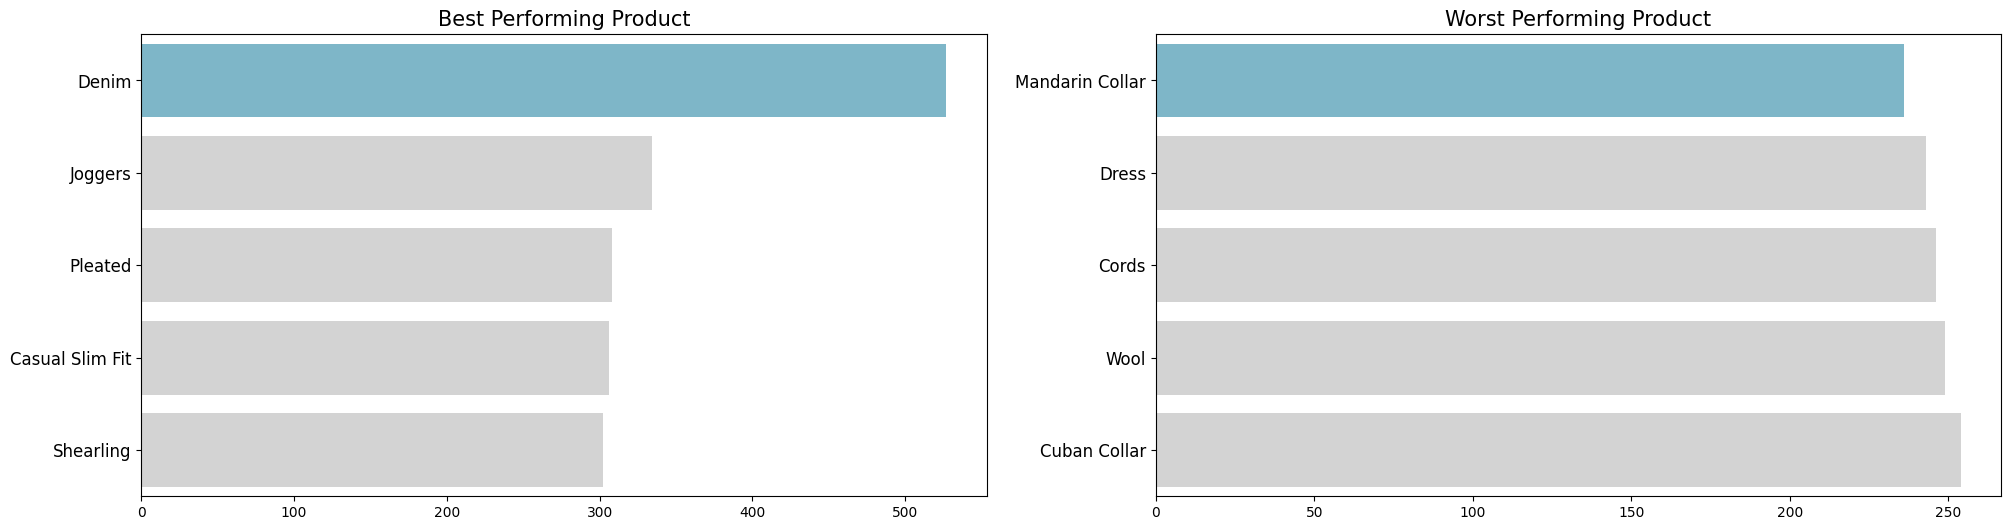

In [78]:
# visualisasi best product dan worst product

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity_x", y="product_name", data=sum_order_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", fontsize=15, loc='center')
ax[0].tick_params(axis='y', labelsize=12)


sns.barplot(x="quantity_x", y="product_name", data=sum_order_df.sort_values(by=['quantity_x'], ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Worst Performing Product", fontsize=15, loc='center')
ax[1].tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan gambar di atas, Anda dapat melihat bahwa produk Denim merupakan produk yang paling laris. Kontras dengan hal tersebut, produk Mandarin Collar merupakan produk yang paling sedikit terjual.

#### 3. Bagaimana Demografi Pelanggan yang Kita Miliki?

##### - Berdasarkan Gender

In [79]:
bygender_df = all_df.groupby(by=['gender']).customer_id.nunique().reset_index()

bygender_df.rename(columns={"customer_id" : "customer_count"}, inplace=True)
bygender_df

,gender,customer_count
0,Female,73
1,Male,82
2,Prefer not to say,461


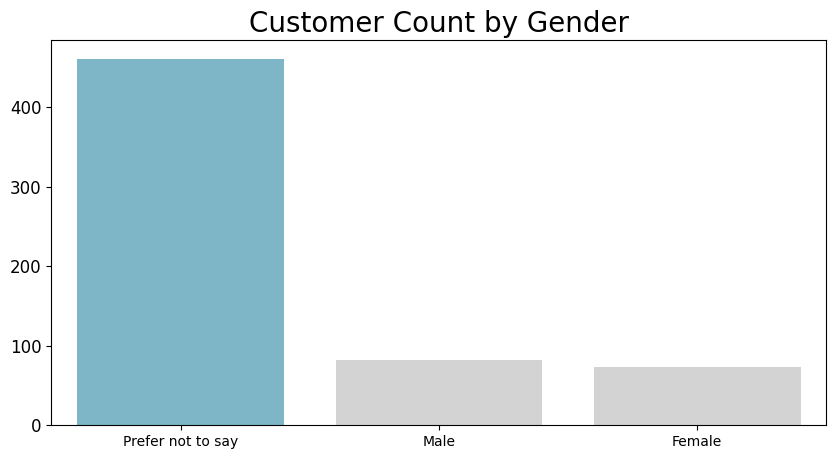

In [80]:
# visualisasi by gender
plt.figure(figsize=(10, 5))
sns.barplot(x="gender", y="customer_count", data=bygender_df.sort_values(by=['customer_count'], ascending=False), palette=colors)
plt.title('Customer Count by Gender', fontsize=20, loc='center')
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan gambar di atas, diketahui bahwa kebanyakan pelanggan tidak bersedia untuk memberitahukan informasi terkait gender-nya.

##### Berdasarkan Age

In [81]:
byage_df = all_df.groupby(by=['age_group']).customer_id.nunique().reset_index()
byage_df.rename(columns={"customer_id" : "customer_count"}, inplace=True)
byage_df

,age_group,customer_count
0,Adults,416
1,Seniors,145
2,Youth,55


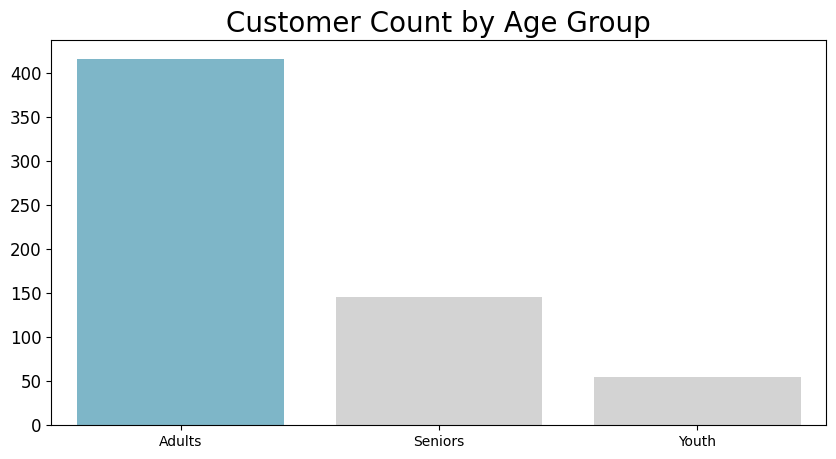

In [82]:
# visualisasi by Age
plt.figure(figsize=(10, 5))
sns.barplot(x="age_group", y="customer_count", data=byage_df.sort_values(by=['customer_count'], ascending=False), palette=colors)
plt.title('Customer Count by Age Group', fontsize=20, loc='center')
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Seperti yang bisa Anda lihat, pelanggan yang kita miliki didominasi oleh kelompok usia dewasa.

##### Berdasarkan States

In [83]:
bystates_df = all_df.groupby('state').customer_id.nunique().reset_index()
bystates_df.rename(columns={"customer_id" : "customer_count"}, inplace=True)
bystates_df

,state,customer_count
0,Australian Capital Territory,73
1,New South Wales,77
2,Northern Territory,75
3,Queensland,79
4,South Australia,90
5,Tasmania,67
6,Victoria,75
7,Western Australia,80


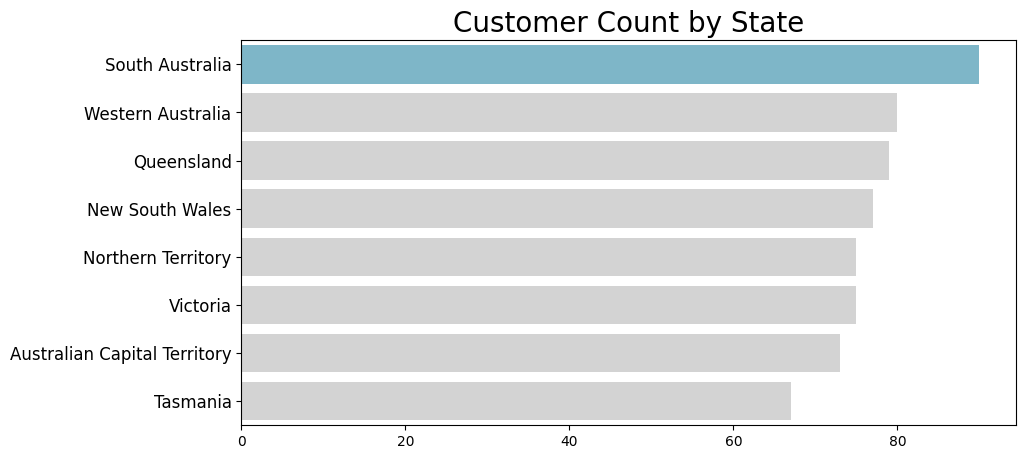

In [84]:
# visualisasi by state
plt.figure(figsize=(10, 5) )
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="customer_count", y="state", data=bystates_df.sort_values(by=['customer_count'], ascending=False), palette=colors_)
plt.title('Customer Count by State', fontsize=20, loc='center')
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan visualisasi data tersebut, dapat diketahui bahwa pelanggan yang kita miliki paling banyak berasal dari negara bagian South Australia.

Sebenarnya, Anda masih dapat mengidentifikasi demografi pelanggan berdasarkan kategori tertentu. Namun, untuk studi kasus ini, kita hanya akan melihat demografi pelanggan berdasarkan tiga kategori tersebut.

RFM Analysis
Untuk menjawab tiga pertanyaan analisis terakhir, kita bisa menggunakan teknik analisis lanjutan yang bernama RFM analysis. Sederhananya, RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.
Nah, berdasarkan tiga parameter tersebut, kita bisa mengidentifikasi pelanggan mana yang memiliki high value (sering melakukan transaksi dan menghasilkan revenue yang besar) dan low value. 

Nah, berdasarkan tiga parameter tersebut, kita bisa mengidentifikasi pelanggan mana yang memiliki high value (sering melakukan transaksi dan menghasilkan revenue yang besar) dan low value. 

Untuk melakukan RFM analysis, kita perlu membuat sebuah DataFrame untuk menampung informasi terkait tiga parameter tersebut.

In [85]:
# rfm analysis

# menghitung RFM
rfm_df = all_df.groupby(by=['customer_id'], as_index=False).agg({
    'order_date' : 'max', # mengambil tanggal order terakhir
    'order_id' : 'nunique', # menghitung jumlah order
    'total_price' : 'sum'}) # menghitung jumlah revenue yang dihasilkan

rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']  # mengubah nama kolom

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df['max_order_timestamp'] = pd.to_datetime(rfm_df['max_order_timestamp']) # mengubah format tanggal menjadi datetime
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date # mengambil tanggal saja

recent_date = orders_df['order_date'].dt.date.max()

rfm_df["recency"] = rfm_df['max_order_timestamp'].apply(lambda x : (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,3,1641,203
1,7,1,1017,156
2,10,1,270,229
3,11,1,382,149
4,12,1,1551,127


Nah, pada tahap ini Anda dapat mengidentifikasi best customer berdasarkan parameter frequency, monetary, dan recancy 

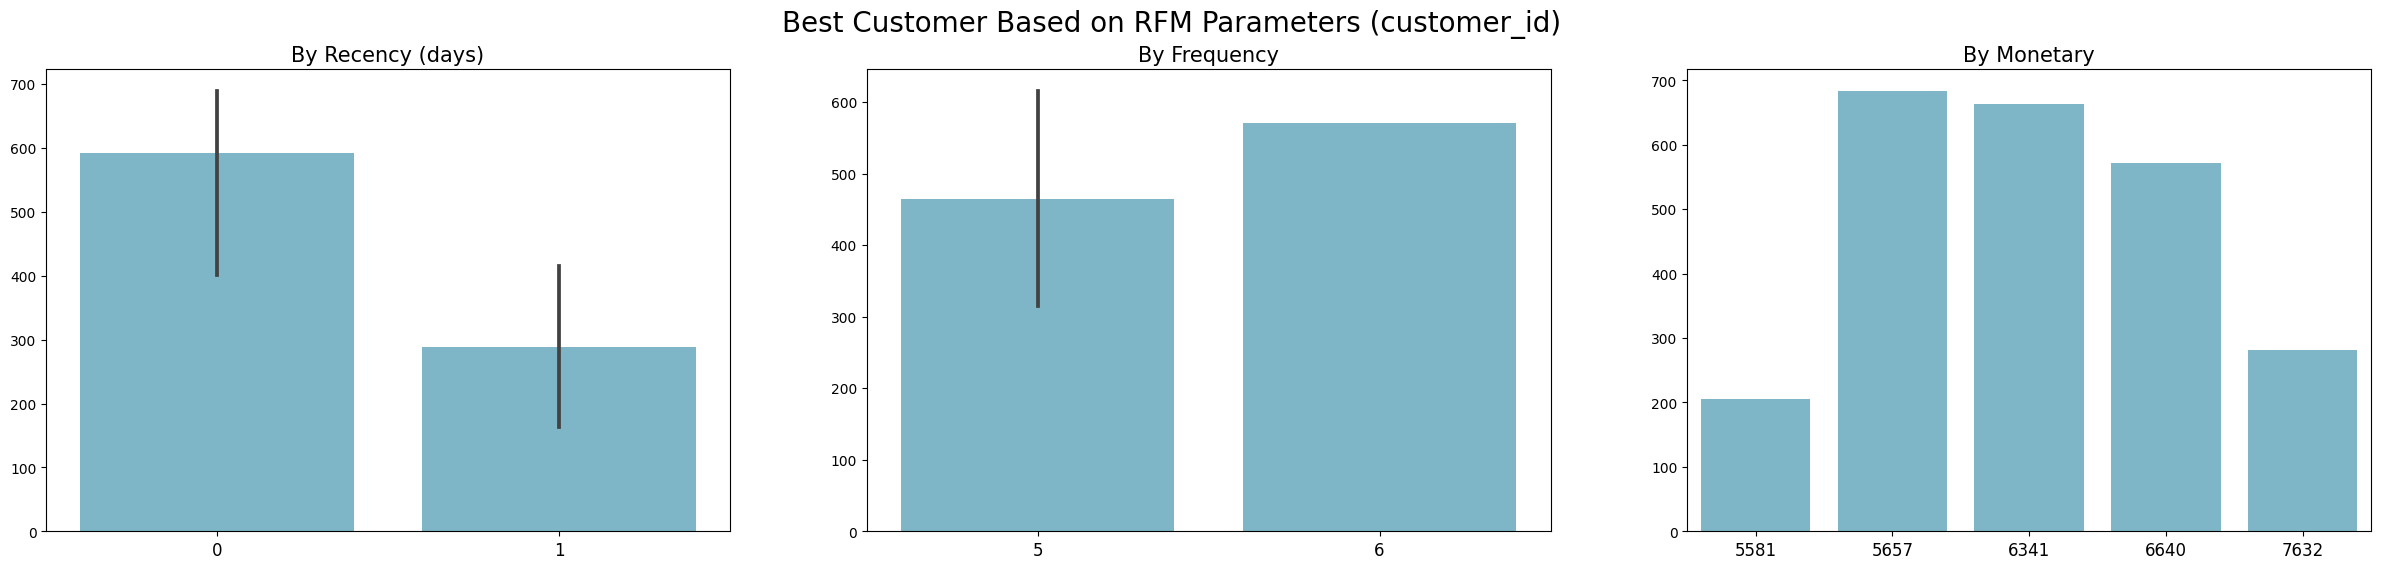

In [86]:
# visualisasi
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))  # membuat 3 subplot

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(x="recency", y="customer_id", data=rfm_df.sort_values(by=['recency'], ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", fontsize=15, loc='center')
ax[0].tick_params(axis='x', labelsize=12)

sns.barplot(x="frequency", y="customer_id", data=rfm_df.sort_values(by=['frequency'], ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", fontsize=15, loc='center')
ax[1].tick_params(axis='x', labelsize=12)

sns.barplot(x="monetary", y="customer_id", data=rfm_df.sort_values(by=['monetary'], ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", fontsize=15, loc='center')
ax[2].tick_params(axis='x', labelsize=12)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

Dari visualisasi data di atas, kita dapat melihat beberapa pelanggan terbaik berdasarkan ketiga parameter tersebut. Informasi ini tentunya dapat membantu kita dalam menjawab tiga pertanyaan analisis terakhir.

In [87]:
# all_df.to_csv('all_data.csv', index=False)

In [90]:
import pkg_resources
import os

# Daftar semua library yang digunakan dalam proyek
libraries = [pkg.key for pkg in pkg_resources.working_set]

# Filter library yang digunakan dalam proyek Anda
project_path = "Dicoding_Fashion_Data_Wragling.ipynb"  # Ganti dengan path file proyek Anda
used_libraries = [lib for lib in libraries if os.path.exists(os.path.join(project_path, lib))]

# Simpan daftar library ke dalam file recruitments.txt
with open('recruitments.txt', 'w') as file:
    file.write('\n'.join(used_libraries))

print("Daftar library yang digunakan telah disimpan dalam recruitments.txt")


Daftar library yang digunakan telah disimpan dalam recruitments.txt


In [97]:
import pkg_resources

# Dapatkan daftar semua package (paket) yang digunakan beserta versinya
installed_packages = pkg_resources.working_set
used_packages = sorted([f"{package.key}=={package.version}" for package in installed_packages])

# Tampilkan daftar package (paket) beserta versinya
used_packages


['aiohttp==3.8.4',
 'aiosignal==1.3.1',
 'altair==4.2.2',
 'analytics-python==1.4.0',
 'anyio==3.5.0',
 'appdirs==1.4.4',
 'argon2-cffi-bindings==21.2.0',
 'argon2-cffi==21.3.0',
 'asttokens==2.0.5',
 'async-generator==1.10',
 'async-timeout==4.0.2',
 'attrs==22.1.0',
 'autopep8==2.0.1',
 'babel==2.11.0',
 'backcall==0.2.0',
 'backoff==1.10.0',
 'beautifulsoup4==4.11.1',
 'bleach==4.1.0',
 'blinker==1.5',
 'bottleneck==1.3.5',
 'brotli==1.0.9',
 'brotlipy==0.7.0',
 'cachetools==5.3.0',
 'certifi==2022.12.7',
 'cffi==1.15.1',
 'chardet==3.0.4',
 'charset-normalizer==2.1.1',
 'chart-studio==1.1.0',
 'click==8.1.3',
 'cmdstanpy==1.1.0',
 'codeium-jupyter==1.1.21',
 'colorama==0.4.5',
 'colorlover==0.3.0',
 'contourpy==1.0.6',
 'convertdate==2.4.0',
 'crc32c==2.3.post0',
 'cryptography==38.0.1',
 'cufflinks==0.17.3',
 'cycler==0.11.0',
 'cython==0.29.32',
 'dash-bootstrap-components==1.3.0',
 'dash-colorscales==0.0.4',
 'dash-core-components==2.0.0',
 'dash-daq==0.5.0',
 'dash-html-compone

In [98]:
with open('recruitments.txt', 'w') as file:
    for package in used_packages:
        file.write(f"{package}\n")
